## Plot the Flux Cross-sections: Victoria Sill

In [2]:
import cmocean.cm as cm
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import LogNorm

import numpy as np
import scipy.interpolate as interp
import xarray as xr

%matplotlib inline
plt.rcParams['font.size'] = 16

In [3]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdepw_1d)
fjgrid = 177
jgrid = fjgrid-1
tmask = mymesh.tmask[0]
fmask = mymesh.fmask[0, :, :, jgrid]
f_lats = mymesh.gphif[0, :, jgrid]
v_lats = mymesh.gphiv[0, :, jgrid]    # note switch to u with the switch from t to f
w_depths = mymesh.gdepw_1d
xs, ys = np.meshgrid(np.array(mymesh.gphiu[0, :, jgrid]), np.array(mymesh.gdept_1d))

In [4]:
m2lat = ((v_lats[301]-v_lats[234])/(mymesh.e2f[0, 234:301, jgrid].sum())).values
m2lat

array(7.85723832e-06)

In [5]:
def draw_patches(fmask, ll, ul, v_lats, w_depths, alpha=1):
    topo = []
    for i in range(ll, ul):
        for j in range(39):
            if fmask[j, i] == 0:
                rect = Rectangle((v_lats[i], w_depths[j]), v_lats[i+1]-v_lats[i], w_depths[j+1]-w_depths[j])
                topo.append(rect)
    pc = PatchCollection(topo, facecolors='lightgray', edgecolors='lightgray', alpha=alpha)
    return(pc)

In [6]:
def get_data_forward(month, year, section=2):
    amonth = glob.glob('/data/sallen/results/Ariane/FullSouth/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lats = mydata.init_lat[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lats = np.concatenate((lats, mydata.init_lat[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        mydata.close()
    return lats, depths, transports

In [7]:
def get_data_backward_gi(month, year, section = 3):
    amonth = glob.glob('/data/sallen/results/Ariane/BackSouth/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lats = mydata.init_lat[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lats = np.concatenate((lats, mydata.init_lat[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        mydata.close()
    return lats, depths, transports

In [8]:
def get_data_forward_gi(month, year, section = 3):
    amonth = glob.glob('/data/sallen/results/Ariane/FullSouth//*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lats = mydata.init_lat[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lats = np.concatenate((lats, mydata.init_lat[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        mydata.close()
    return lats, depths, transports

In [9]:
def get_data_backward(month, year, section=2):
    amonth = glob.glob('/data/sallen/results/Ariane/BackSouth/*'+month+str(year)+'/ariane_positions_quantitative.nc')
    mydata = xr.open_dataset(amonth[0])
    lats = mydata.init_lat[(mydata.final_section==section)]
    depths = depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]
    transports = mydata.init_transp[(mydata.final_section==section)]
    mydata.close()
    for f in amonth[1:]:
        mydata = xr.open_dataset(f)
        lats = np.concatenate((lats, mydata.init_lat[(mydata.final_section==section)]))
        depths = np.concatenate((depths, depthf(mydata.init_z[(mydata.final_section==section)]-1.)[0]))
        transports = np.concatenate((transports, mydata.init_transp[(mydata.final_section==section)]))
        mydata.close()
    return lats, depths, transports

In [10]:
month = {1:'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 
         8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
lats, depths, transports = np.array([]), np.array([]), np.array([])
months = 4*np.ones_like(lats)
years = 15*np.ones_like(lats)
for y in [15, 16, 17, 18]:
    print(y)
    for m in month:
        newlats, newdepths, newtransports = get_data_backward(month[m], y)
        newmonths = m*np.ones_like(newlats)
        newyears = y*np.ones_like(newlats)
        lats = np.concatenate((lats, newlats))
        depths = np.concatenate((depths, newdepths))
        transports = np.concatenate((transports, newtransports))
        months = np.concatenate((months, newmonths))
        years = np.concatenate((years, newyears))
        
        newlats, newdepths, newtransports = get_data_backward_gi(month[m], y)
        newmonths = m*np.ones_like(newlats)
        newyears = y*np.ones_like(newlats)
        lats = np.concatenate((lats, newlats))
        depths = np.concatenate((depths, newdepths))
        transports = np.concatenate((transports, newtransports))
        months = np.concatenate((months, newmonths))
        years = np.concatenate((years, newyears))

15
16
17
18


In [11]:
month = {1:'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 
         8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
olats, odepths, otransports = np.array([]), np.array([]), np.array([])
omonths = 4*np.ones_like(olats)
oyears = 15*np.ones_like(olats)
for y in [15, 16, 17, 18]:
    print(y)
    for m in month:
        newlats, newdepths, newtransports = get_data_forward(month[m], y)
        newmonths = m*np.ones_like(newlats)
        newyears = y*np.ones_like(newlats)
        olats = np.concatenate((olats, newlats))
        odepths = np.concatenate((odepths, newdepths))
        otransports = np.concatenate((otransports, newtransports))
        omonths = np.concatenate((omonths, newmonths))
        oyears = np.concatenate((oyears, newyears))
        
        newlats, newdepths, newtransports = get_data_forward_gi(month[m], y)
        newmonths = m*np.ones_like(newlats)
        newyears = y*np.ones_like(newlats)
        olats = np.concatenate((olats, newlats))
        odepths = np.concatenate((odepths, newdepths))
        otransports = np.concatenate((otransports, newtransports))
        omonths = np.concatenate((omonths, newmonths))
        oyears = np.concatenate((oyears, newyears))

15
16
17
18


0.4486243521203278


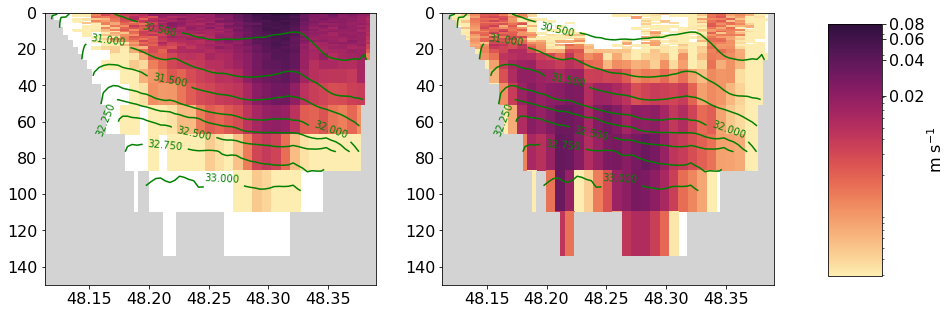

In [12]:
salfile = xr.open_dataset('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20150401_20150430.nc')
salinity = 0.5*(np.ma.array(salfile.vosaline[0, :, :, jgrid],
                       mask=1-tmask[:, :, jgrid]) +
                    np.ma.array(salfile.vosaline[0, :, :, jgrid+1],
                       mask=1-tmask[:, :, jgrid+1]))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
vmax = 0.08 / transports[(years==15) & (months==4)].sum() / m2lat * 24 * 30
v2max = 0.08 / otransports[(oyears==15) & (omonths==4)].sum() / m2lat * 24 * 30
vmin = 0.008  # was missing
imin, imax = 234-2, 301+2
gridding = 2
c, xedge, yedge, im = axs[0].hist2d(lats[(years==15) & (months==4)], 
                                depths[(years==15) & (months==4)],
                                weights=transports[(years==15) & (months==4)],
                                bins=[np.array(f_lats[imin:imax:gridding]), w_depths[0]], cmap=cm.matter, 
                                density=True, norm=LogNorm(vmax=vmax, vmin=vmin*vmax))

c, xedge, yedge, im2 = axs[1].hist2d(olats[(oyears==15) & (omonths==4)], 
                                odepths[(oyears==15) & (omonths==4)],
                                weights=otransports[(oyears==15) & (omonths==4)],
                                bins=[np.array(f_lats[imin:imax:gridding]), w_depths[0]], cmap=cm.matter, 
                                density=True, norm=LogNorm(vmax=v2max, vmin=vmin*v2max))
print (c.max()/v2max)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cb1 = fig.colorbar(im2, cax=cbar_ax)
cb1.set_label('m s$^{-1}$', labelpad=2)
myticks = np.arange(5)/4
cb1.set_ticks(v2max*myticks)
mylabels = ['0']
for tick in myticks[1:]:
    mylabels.append(f'{tick * v2max * float(m2lat) * otransports[(oyears==15) & (omonths==4)].sum()/24/30:.2f}')
cb1.set_ticklabels(mylabels)


for ax in axs:
    ax.invert_yaxis()
    ax.set_ylim(150, 0)
    CS = ax.contour(xs, ys, salinity,  [30, 30.5, 31, 31.5, 32, 32.25, 32.5, 32.75, 33, 33.25], colors='g')
    ax.clabel(CS, inline=1, fontsize=10)
pc = draw_patches(fmask, imin, imax, np.array(v_lats), np.array(w_depths[0]))
axs[0].add_collection(pc)
pc = draw_patches(fmask, imin, imax, np.array(v_lats), np.array(w_depths[0]))
axs[1].add_collection(pc)


So to keep this all under control we want: for the paper renewal "Jul-Oct", Winter "Dec-Mar" Averages over the 4 years

For the supps.  Lets try the monthlies and see what they look like.  (Worry about the salinity later)

In [13]:
fullmonths = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthend = ['31', '28', '31', '30', '31', '30', '31', '31', '30', '31', '30', '31']
leapend = ['31', '29', '31', '30', '31', '30', '31', '31', '30', '31', '30', '31']

cutoff 0.0105084308993672 0.002
0.20717578006885917
0.07525546227120086
cutoff 0.005984536968380002 0.002
0.4729333780799697
0.2054728787079995
cutoff 0.006333200140647297 0.002
0.3655775745860218
0.16856791238083874
cutoff 0.01212657990737161 0.002
0.24357424705263575
0.056653563261347364
[0.01950421 0.04876053 0.09752106 0.19504213 0.48760531 0.97521063
 2.43802656]
0.005
0.01
0.02
0.05
0.1
0.25
['0.002', '0.01', '0.01', '0.02', '0.05', '0.10', '0.25']


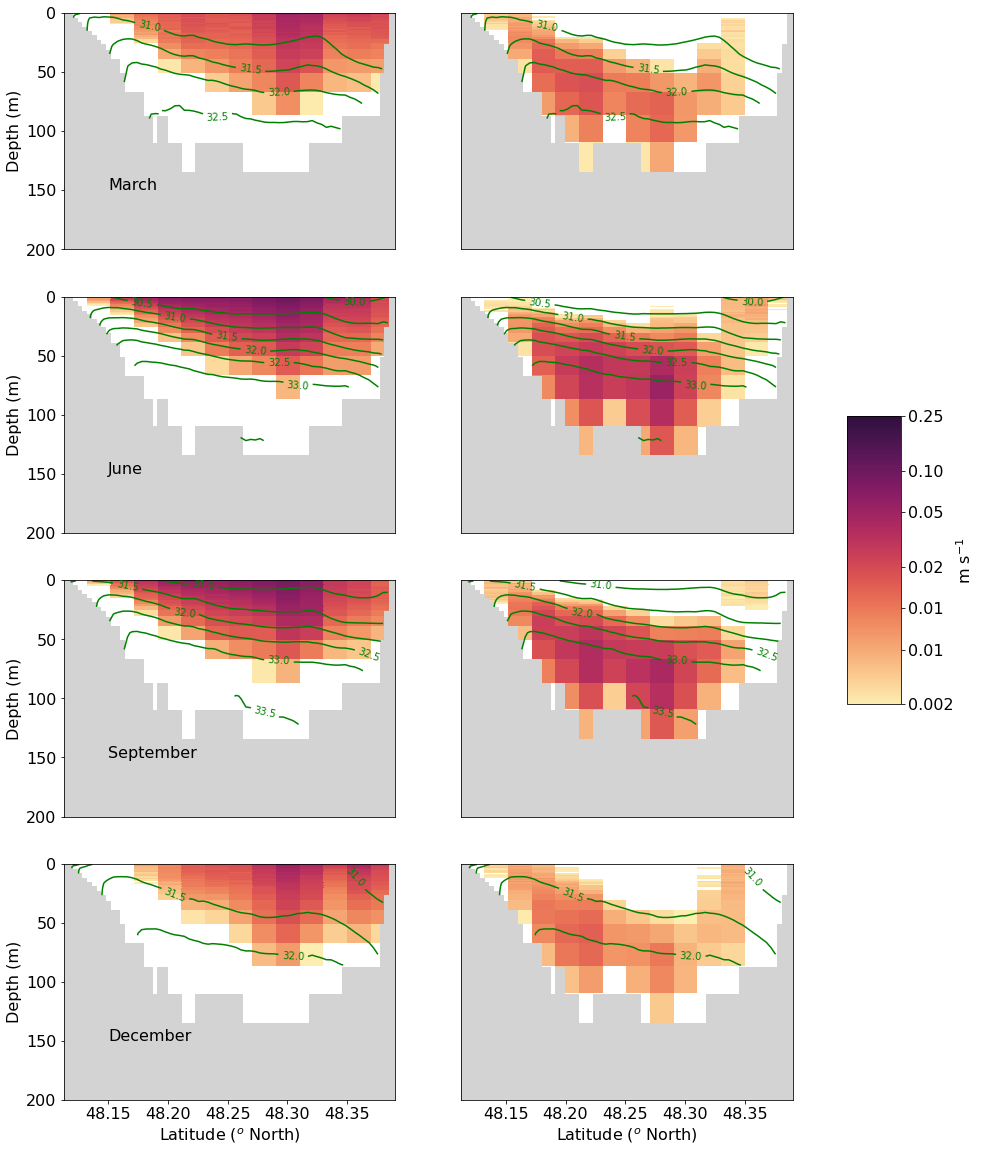

In [21]:
fig, axs = plt.subplots(4, 2, figsize=(15, 5*4))

cmap = cm.matter
cmap.set_under('white')

for ix in range(4):
    month = 3 + ix*3
    imonth = month - 1
    vmax = 0.25 / (transports[(months==month)].sum() * 0.25) / m2lat * 24 * 30
    v2max = 0.25 / (otransports[(omonths==month)].sum() * 0.25) / m2lat * 24 * 30
    vmin = 0.008
    print ('cutoff', vmin*vmax, 0.008*0.25) 

    imin, imax = 234-2, 301+2
    gridding = 5
    c, xedge, yedge, im = axs[ix, 0].hist2d(lats[(months==month)], 
                                depths[(months==month)],
                                weights=transports[(months==month)],
                                bins=[np.array(f_lats[imin:imax:gridding]), w_depths[0]], cmap=cm.matter, 
                                 density=True, norm=LogNorm(vmax=vmax, vmin=vmin*vmax))
    print(c.max()/vmax)
    c, xedge, yedge, im2 = axs[ix, 1].hist2d(olats[(omonths==month)], 
                                odepths[(omonths==month)],
                                weights=otransports[(omonths==month)],
                                bins=[np.array(f_lats[imin:imax:gridding]), w_depths[0]], cmap=cm.matter, 
                                density=True, norm=LogNorm(vmax=v2max, vmin=vmin*v2max))
    print (c.max()/v2max)
    
    for ax in axs[ix]:
        ax.invert_yaxis()
        ax.set_ylim(200, 0)
    axs[ix, 0].text(48.15, 150, fullmonths[imonth])
    
    salinity = np.zeros_like(np.array(tmask[:, :, jgrid]))
    salfiles = [xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_2015{month:02d}01_2015{month:02d}{monthend[imonth]}.nc'),
                xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_2016{month:02d}01_2016{month:02d}{leapend[imonth]}.nc'),
                xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_2017{month:02d}01_2017{month:02d}{monthend[imonth]}.nc'),
                xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_2018{month:02d}01_2018{month:02d}{monthend[imonth]}.nc')]
    for isal in range(4):
        salinity = salinity + 0.5*(np.ma.array(salfiles[isal].vosaline[0, :, :, jgrid],
                       mask=1-tmask[:, :, jgrid]) +
                        np.ma.array(salfiles[isal].vosaline[0, :,:,  jgrid+1],
                           mask=1-tmask[:, :, jgrid+1]))
        salfiles[isal].close()
    salinity = 0.25*salinity
    for ax in axs[ix]:
        CS = ax.contour(xs, ys, salinity,  [30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5], colors='g')
        ax.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
    pc = draw_patches(fmask, imin, imax, np.array(v_lats), np.array(w_depths[0]))
    axs[ix, 0].add_collection(pc)
    pc = draw_patches(fmask, imin, imax, np.array(v_lats), np.array(w_depths[0]))
    axs[ix, 1].add_collection(pc)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.4, 0.05, 0.2])
cb1 = fig.colorbar(im2, cax=cbar_ax)
cb1.set_label('m s$^{-1}$', labelpad=2)

myticks = np.array([0.008, 0.02, 0.04, 0.08, 0.2, 0.4, 1.0])
cb1.set_ticks(v2max*myticks)
print (v2max*myticks)
mylabels = ['hold']
for tick in myticks[1:]:
    thelabel = tick * v2max * m2lat * otransports[(omonths==month)].sum() * 0.25/24/30
    print (thelabel)
    mylabels.append(f'{thelabel:.2f}')
mylabels[0] = f'{thelabel*vmin:.3f}'
print (mylabels)
cb1.minorticks_off()
cb1.set_ticklabels(mylabels)

for ax in axs[:, 1]:
    ax.set_yticks([])
for ax in axs[:, 0]:
    ax.set_ylabel('Depth (m)')
for ix in range(2):
    for ax in axs[:-1, ix]:
        ax.set_xticks([])
    axs[-1, ix].set_xlabel("Latitude ($^o$ North)")
    
fig.savefig('VictoriaSillFlux.png')
fig.savefig('VictoriaSillFlux.pdf')

0.239043305887871
0.06031659077822112
0.18205828782391337
0.061860826278177086
0.26820768772681713
0.0739670717626396
0.2901882138871493
0.12396687131048403
0.38257785127888316
0.17901444005372164
0.5258166618744897
0.2135607824683339
0.4857126442879538
0.22756650327837027
0.48471859203877765
0.2193722518169561
0.3147512959966566
0.13427565031847816
0.4292376770660689
0.12162671271844236
0.25574471900943485
0.07193983027283721
0.18866366967836926
0.039674418851515736


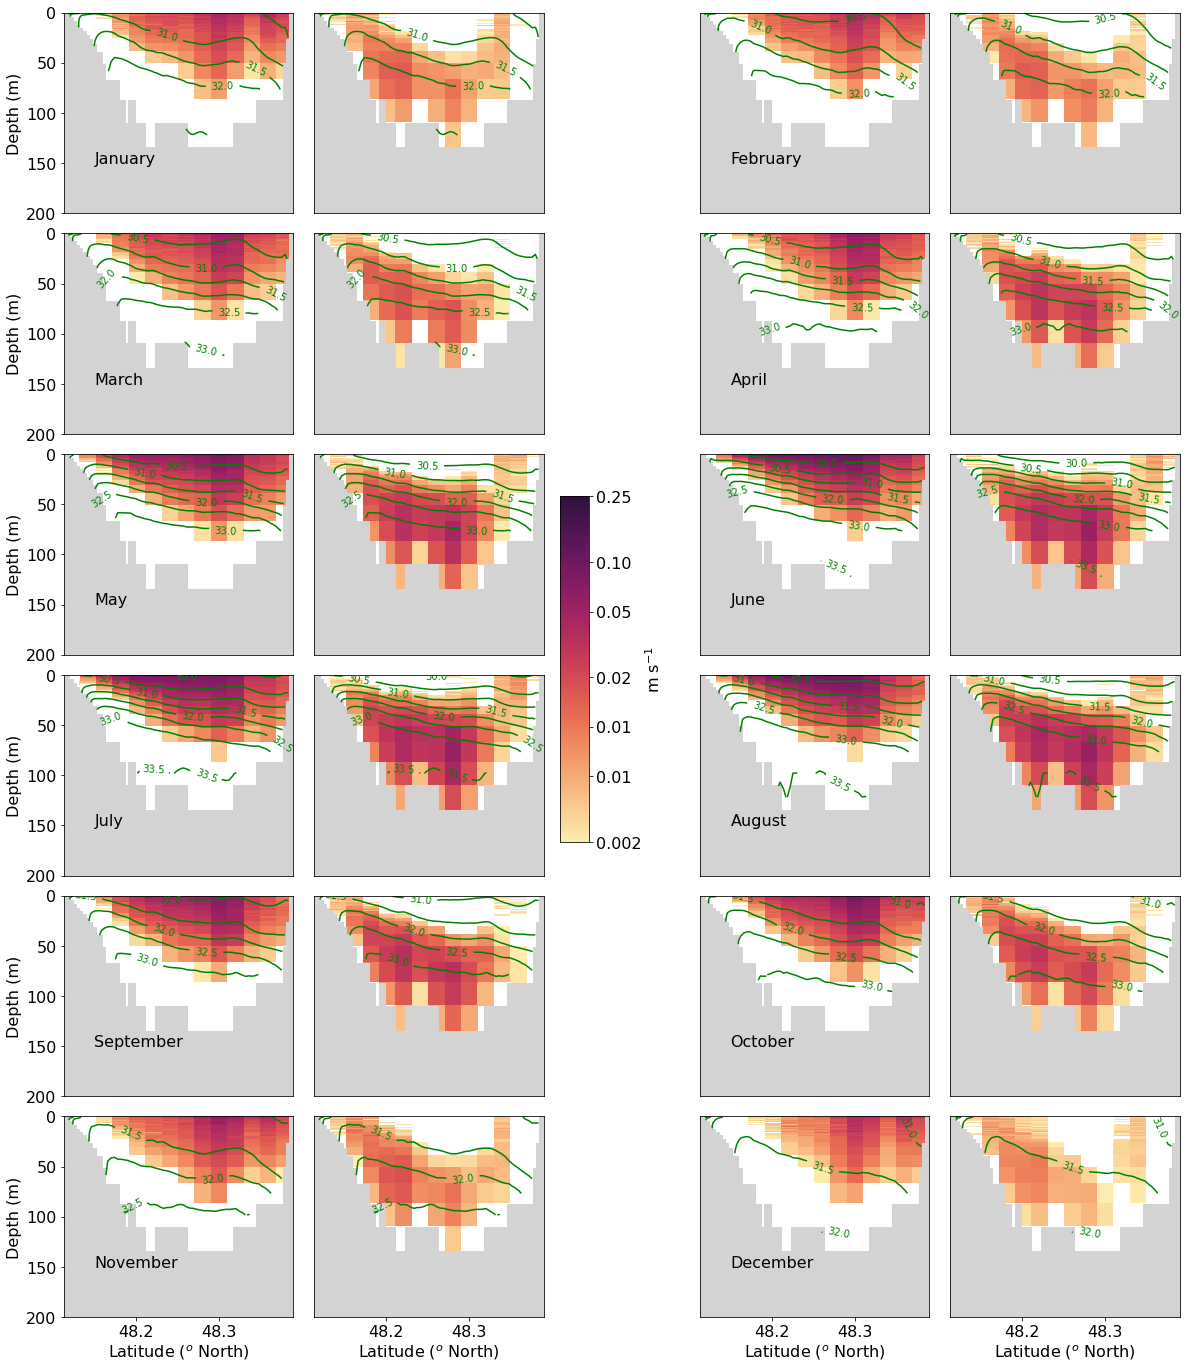

In [15]:
fig = plt.figure()
 
fig.set_figheight(4*6)
fig.set_figwidth(20)

spec = gridspec.GridSpec(ncols=5, nrows=6,
                         width_ratios=[2, 2, 1, 2, 2], wspace=0.1,
                         hspace=0.1, height_ratios=[1, 1, 1, 1, 1, 1])

year = 2015
iy = 15

cmap = cm.matter
cmap.set_under('white')

ix = 0
axs = [None]*5*6

for imonth in range(12):
    month = imonth + 1
    
    axs[ix] = fig.add_subplot(spec[ix])

    vmax = 0.25 / transports[(years==15) & (months==month)].sum() / m2lat * 24 * 30
    v2max = 0.25 / otransports[(oyears==15) & (omonths==month)].sum() / m2lat * 24 * 30
    vmin = 0.008

    imin, imax = 234-2, 301+2
    gridding = 5
    c, xedge, yedge, im = axs[ix].hist2d(lats[(years==iy) & (months==month)], 
                                depths[(years==15) & (months==month)],
                                weights=transports[(years==iy) & (months==month)],
                                bins=[np.array(f_lats[imin:imax:gridding]), w_depths[0]], cmap=cm.matter, 
                                density=True, norm=LogNorm(vmax=vmax, vmin=vmin*vmax))
    print(c.max()/vmax)
    ix = ix + 1
    axs[ix] = fig.add_subplot(spec[ix])
    c, xedge, yedge, im2 = axs[ix].hist2d(olats[(oyears==iy) & (omonths==month)], 
                                odepths[(oyears==15) & (omonths==month)],
                                weights=otransports[(oyears==iy) & (omonths==month)],
                                bins=[np.array(f_lats[imin:imax:gridding]), w_depths[0]], cmap=cm.matter, 
                                density=True, norm=LogNorm(vmax=v2max, vmin=vmin*v2max))
    print (c.max()/v2max)
    
    for ax in axs[ix-1:ix+1]:
        ax.invert_yaxis()
        ax.set_ylim(200, 0)
    axs[ix-1].text(48.15, 150, fullmonths[imonth])
  
    salfile = xr.open_dataset(f'/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_{year}{month:02d}01_{year}{month:02d}{monthend[imonth]}.nc')           
    salinity = 0.5*(np.ma.array(salfile.vosaline[0, :, :, jgrid],
                       mask=1-tmask[:, :, jgrid]) +
                        np.ma.array(salfile.vosaline[0, :, :, jgrid+1],
                           mask=1-tmask[:, :, jgrid+1]))
    salfile.close()
    
    for ax in axs[ix-1:ix+1]:
        CS = ax.contour(xs, ys, salinity,  [30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5], colors='g')
        ax.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
        
    pc = draw_patches(fmask, imin, imax, np.array(v_lats), np.array(w_depths[0]))
    axs[ix-1].add_collection(pc)
    pc = draw_patches(fmask, imin, imax, np.array(v_lats), np.array(w_depths[0]))
    axs[ix].add_collection(pc)
    
    if ix in [1, 6, 11, 16, 21, 26]:
        axs[ix].set_yticks([])
        axs[ix-1].set_ylabel('Depth (m)')
    else:
        axs[ix].set_yticks([])
        axs[ix-1].set_yticks([])
    
    if ix not in [26, 29]:
        axs[ix].set_xticks([])
        axs[ix-1].set_xticks([])
    
    ix = ix + 1
    if ix in [2, 7, 12, 17, 22, 27]:
        ix = ix + 1
      
cbar_ax = fig.add_axes([0.47, 0.4, 0.02, 0.2])
cb1 = fig.colorbar(im2, cax=cbar_ax)
cb1.set_label('m s$^{-1}$', labelpad=2)
myticks = np.array([0.008, 0.02, 0.04, 0.08, 0.2, 0.4, 1.0])
cb1.set_ticks(v2max*myticks)
mylabels = ['hold']
for tick in myticks[1:]:
    thelabel = tick * v2max * m2lat * otransports[(oyears==15) & (omonths==month)].sum()/24/30
    mylabels.append(f'{thelabel:.2f}')
mylabels[0] = f'{thelabel*vmin:.3f}'
cb1.minorticks_off()
cb1.set_ticklabels(mylabels)

for ix in [25, 26, 28, 29]:
    axs[ix].set_xlabel("Latitude ($^o$ North)")
    
fig.savefig('VictoriaSill2015_allmonths.png')
fig.savefig('VictoriaSill2015_allmonths.pdf')
        